This notebook demonstrates how we can build a working linear regression model using NumPy library only

Assume we know X and y are linearly correlated

# 1. Initialize

In [1]:
import numpy as np 
np.random.seed(42) # for reproducibility

# 2. Generate data

Make sure X and y are linearly correlated with normally distributed noise

In [2]:
n = 10000 # 10000 datum points
X = np.random.uniform(-10,10, n) 
noise = np.random.normal(0, 3, n) # Gaussian distribution
true_w, true_b = 7.6, -3.3

In [3]:
y = true_w * X + true_b + noise # y = w * x + b + ε

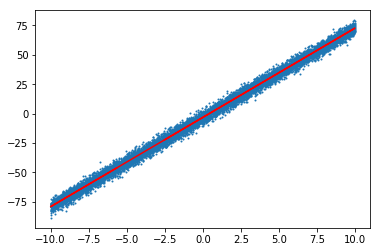

In [5]:
# Optional
import matplotlib.pyplot as plt
plt.scatter(X,y, s=1)
plt.plot(X,true_w * X + true_b, 'red')
plt.show()

# 3. Gradient Descent

In [6]:
def gradient_descent(X, y, w, b, learning_rate):
    dw = -2 * np.sum(X * (y - w * X - b)) # ∂e/∂w
    db = -2 * np.sum(y - w * X - b)       # ∂e/∂b
    w_new = w - learning_rate * dw        # minus sign since we are minizing e
    b_new = b - learning_rate * db
    return w_new, b_new

def get_loss(X,y,w,b):
    return (y - w * X - b).T @ (y - w * X - b)   # square loss, 
    # .T and @ denote transpose and matrix multiplication resp.

In [22]:
learning_rate = 0.000001
max_epoch = 500

w, b = -1,0

for epoch in range(1,max_epoch+1):
    w,b = gradient_descent(X, y, w, b, learning_rate)
    
    if epoch % 50 == 0:
        print(f'{get_loss(X,y,w,b):.0f}')

if b > 0:
    print(f'y = {w:.2f} x + {b:.2f}')
else:
    print(f'y = {w:.2f} x - {-b:.2f}')

103801
91779
90183
89971
89943
89939
89939
89939
89939
89939
y = 7.59 x - 3.26


# 4. Verify using sklearn

In [21]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X.reshape(-1, 1), y.reshape(-1, 1))
print(f'R^2 score: {reg.score(X.reshape(-1, 1), y.reshape(-1, 1))}')

w, b = [np.asscalar(v) for v in [reg.coef_, reg.intercept_]]
if b > 0:
    print(f'y = {w:.2f} x + {b:.2f}')
else:
    print(f'y = {w:.2f} x - {-b:.2f}')

R^2 score: 0.995308982100681
y = 7.59 x - 3.26
